# Project Name: Credit Card Fraud Detection: Feature Reduction for Better Interpretability and Visualization

## Overview
A financial institution needs to enhance its fraud detection capabilities while maintaining model interpretability for regulatory compliance and risk management decisions.

You have:
- Transaction-level data: 284,807 credit card transactions with 30 features (V1-V28 from PCA transformation, Time, Amount, Class)
- Highly imbalanced dataset: only 0.172% fraudulent transactions (492 out of 284,807)
- Pre-processed features: V1-V28 are principal components from original PCA transformation for privacy protection
- Raw features: Time (seconds elapsed) and Amount (transaction value) requiring standardization

We will:
1. Apply additional dimensionality reduction using PCA to enable 2D/3D visualization of transaction patterns
2. Analyze explained variance ratios to determine optimal number of components for different use cases
3. Create comprehensive visualizations (scatter plots, scree plots) to identify fraud clustering patterns
4. Compare high-dimensional vs. reduced-dimensional representations for interpretability gains

## Goal
Risk management teams can use these visualizations and reduced-feature models for:
- Real-time fraud pattern recognition
- Regulatory reporting with interpretable model components  
- Training junior analysts on fraud detection patterns
- Developing simplified monitoring dashboards for non-technical stakeholders


#### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


#### Notebook utility

In [2]:
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA3.png", "PCA4.webp", "PCA5.webp", "PCA6.png"]
image_size = [1000, 700, 400, 600, 500, 500, 500, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../img/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)


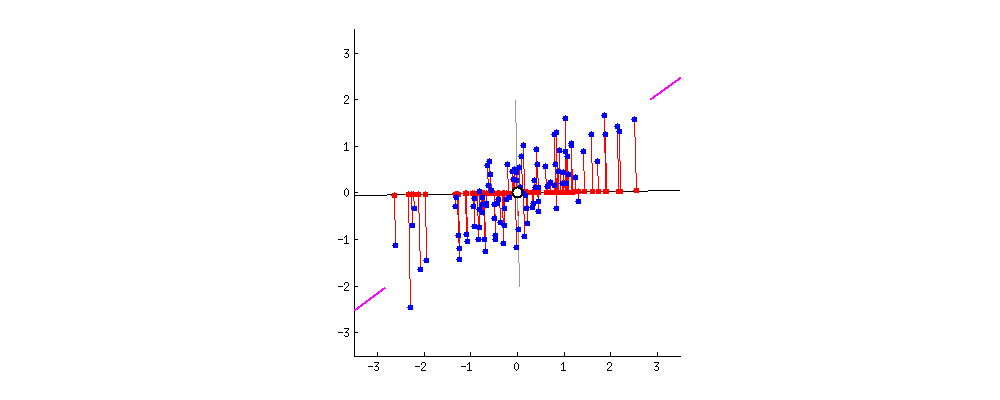

In [3]:
display(HTML(images_html[0]))


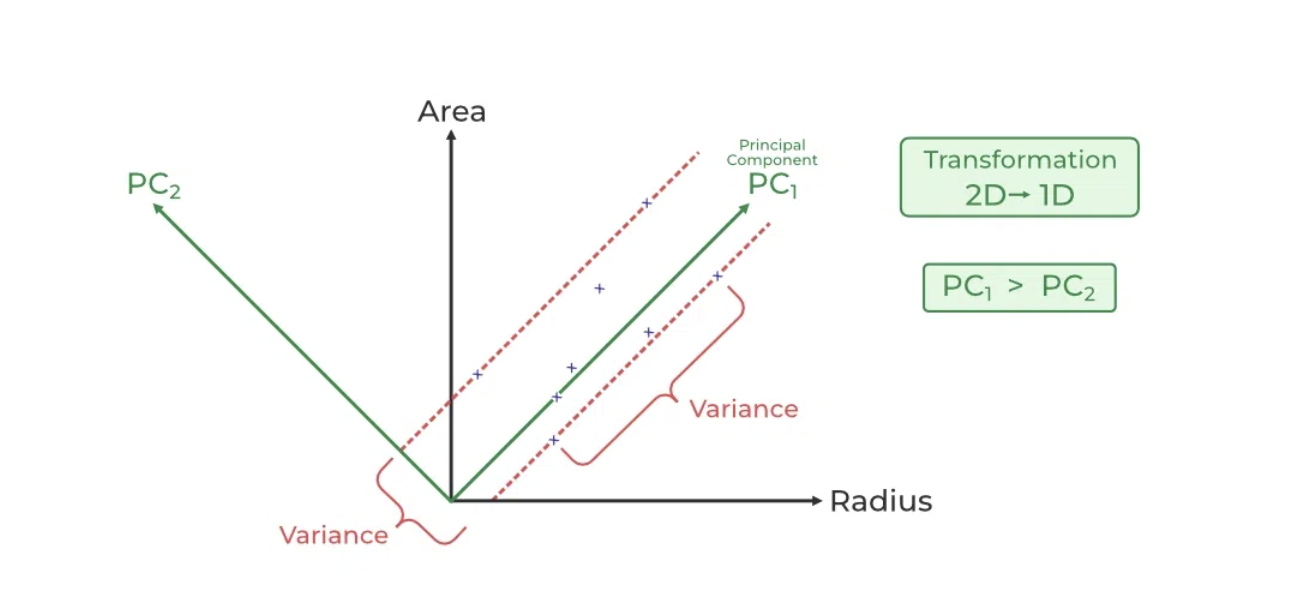

In [4]:
display(HTML(images_html[1]))


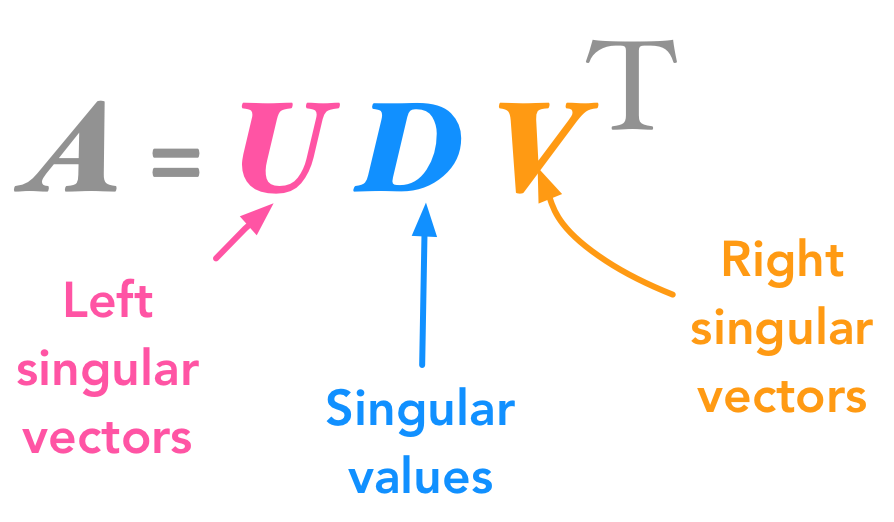

In [5]:
display(HTML(images_html[2]))


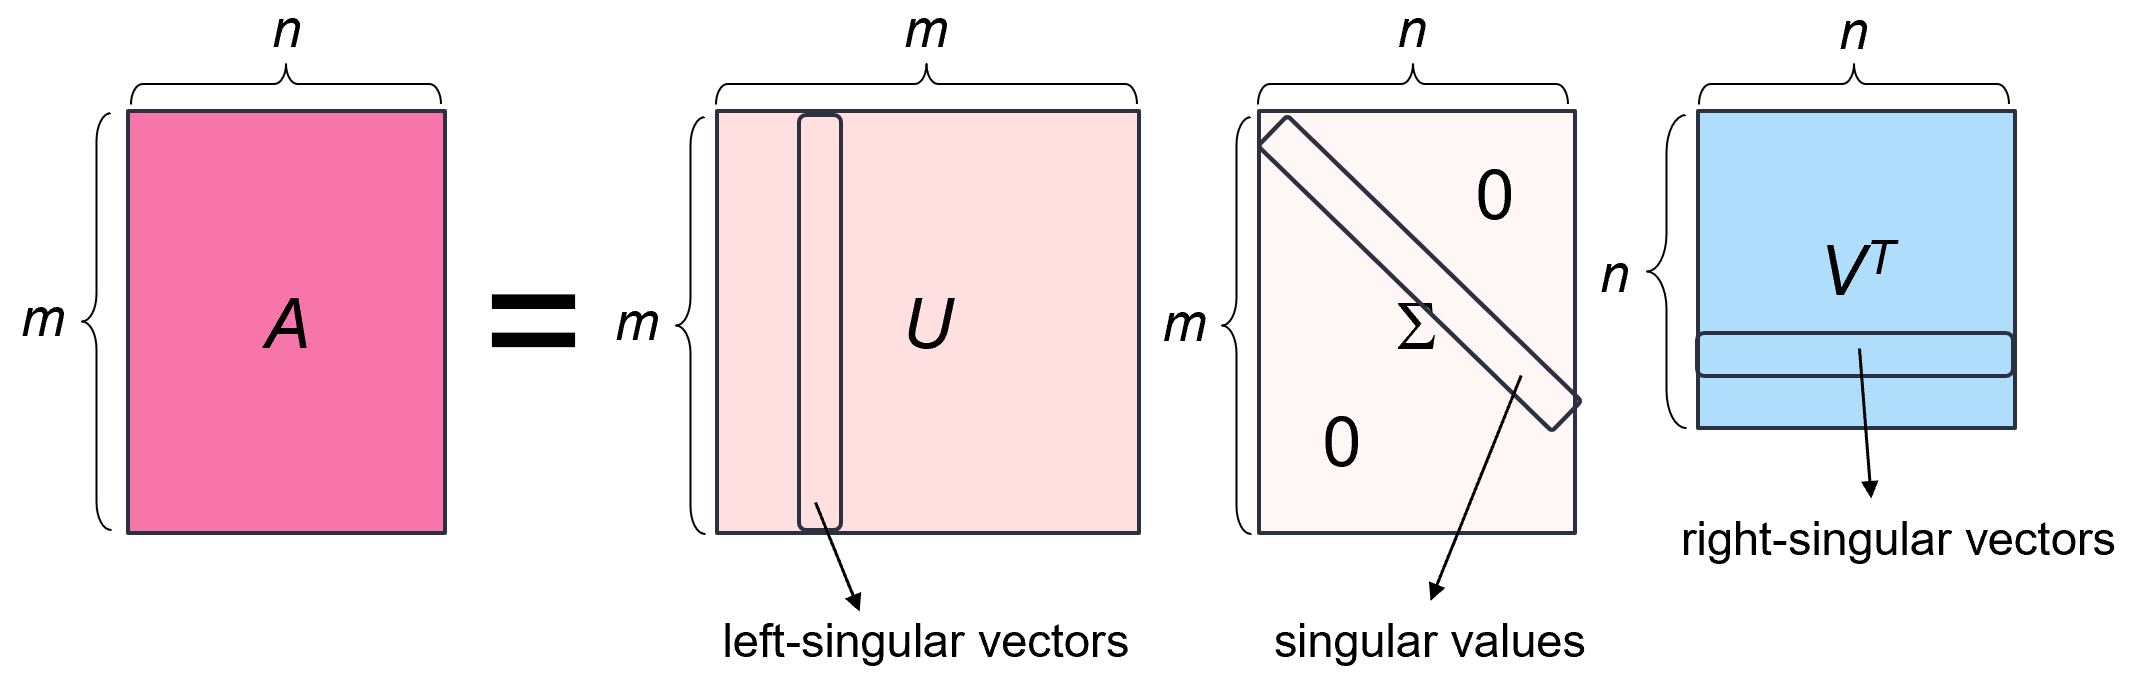

In [6]:
display(HTML(images_html[3]))


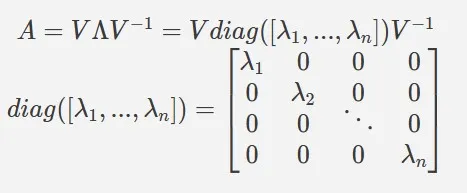

In [7]:
display(HTML(images_html[4]))


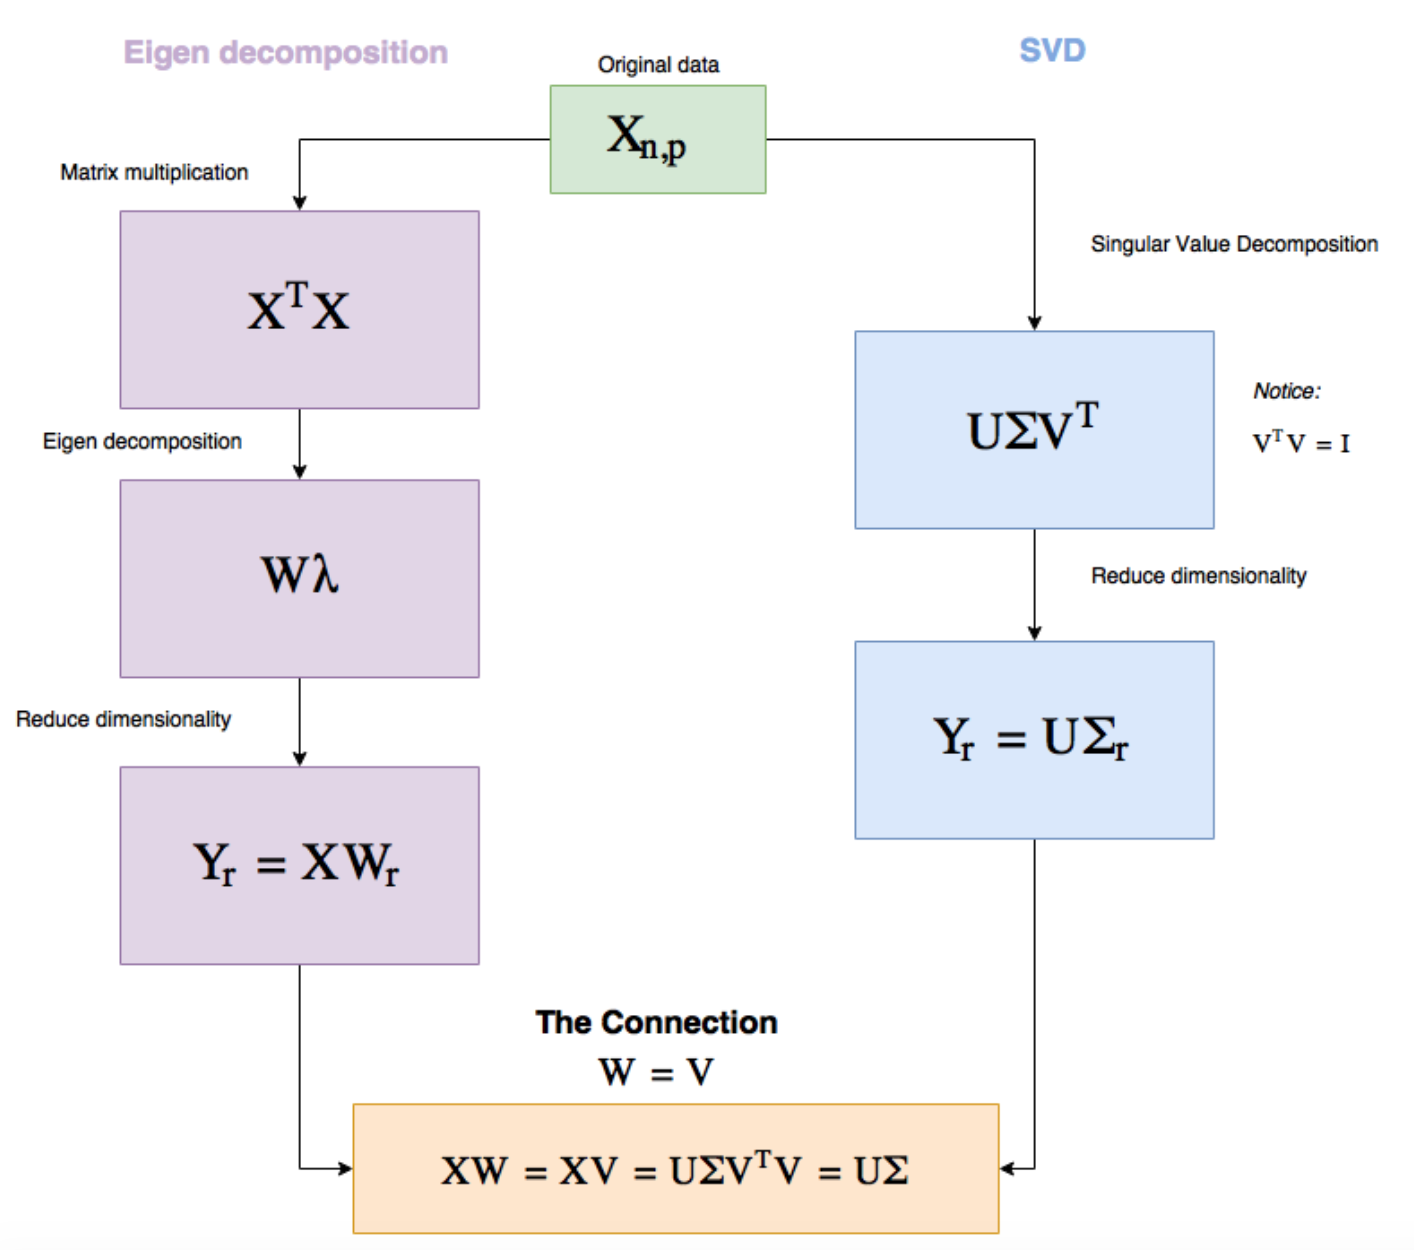

In [8]:
display(HTML(images_html[5]))

#### Load Dataset 

In [ ]:
df = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Exploring the Dataset

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

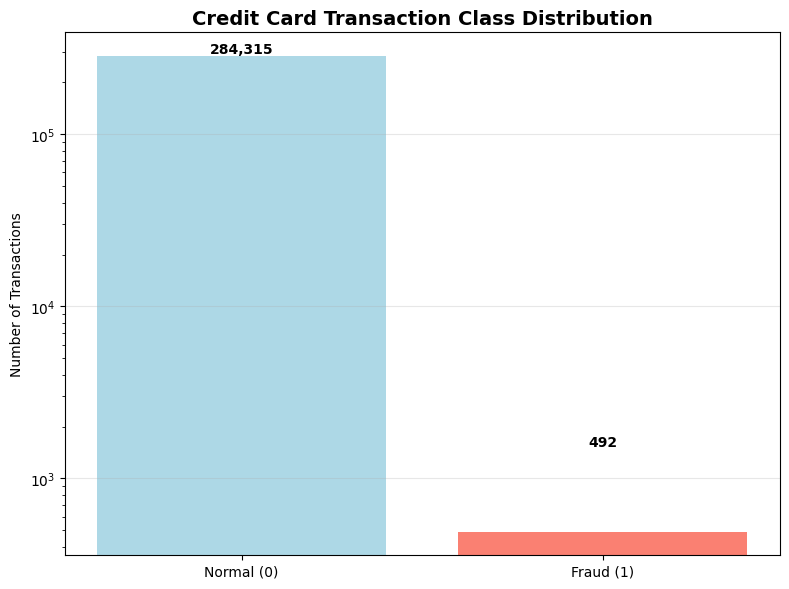

Normal transactions: 284,315
Fraudulent transactions: 492
Imbalance ratio: 577.9:1


In [9]:
# Check for missing values and data types
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum().sum())

print("\nBasic Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['Class'].value_counts())
print(f"\nFraud Percentage: {df['Class'].mean() * 100:.3f}%")

# Create a bar chart showing the class imbalance
plt.figure(figsize=(8, 6))
class_counts = df['Class'].value_counts()
bars = plt.bar(['Normal (0)', 'Fraud (1)'], class_counts.values, 
               color=['lightblue', 'salmon'])

# Add value labels on bars
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.title('Credit Card Transaction Class Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Use log scale due to extreme imbalance
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Normal transactions: {class_counts[0]:,}")
print(f"Fraudulent transactions: {class_counts[1]:,}")
print(f"Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")


#### Preprocess the Data

In [ ]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the Time and Amount features
# V1-V28 are already standardized from previous PCA transformation
scaler = StandardScaler()
X_scaled = X.copy()

# Only standardize Time and Amount columns
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

print("Features after preprocessing:")
print(f"Shape: {X_scaled.shape}")
print(f"Feature names: {list(X_scaled.columns)}")

# Check the standardization results
print(f"\nTime - Mean: {X_scaled['Time'].mean():.6f}, Std: {X_scaled['Time'].std():.6f}")
print(f"Amount - Mean: {X_scaled['Amount'].mean():.6f}, Std: {X_scaled['Amount'].std():.6f}")


Features after preprocessing:
Shape: (284807, 30)
Feature names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Time - Mean: -0.000000, Std: 1.000002
Amount - Mean: 0.000000, Std: 1.000002


#### Apply PCA for Dimensionality Reduction

In [ ]:
# Apply PCA to reduce dimensions for visualization
# We'll reduce to 2 components for 2D visualization and 3 for 3D if needed

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Also create a version with more components to analyze variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

print("PCA Results:")
print(f"Original features: {X_scaled.shape[1]}")
print(f"Reduced to: {X_pca_2d.shape[1]} components")

print(f"\nExplained Variance Ratio (2 components):")
for i, ratio in enumerate(pca_2d.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nTotal variance explained by 2 components: {pca_2d.explained_variance_ratio_.sum():.4f} ({pca_2d.explained_variance_ratio_.sum()*100:.2f}%)")


PCA Results:
Original features: 30
Reduced to: 2 components

Explained Variance Ratio (2 components):
PC1: 0.1209 (12.09%)
PC2: 0.0965 (9.65%)

Total variance explained by 2 components: 0.2174 (21.74%)


#### Visualize PCA Results

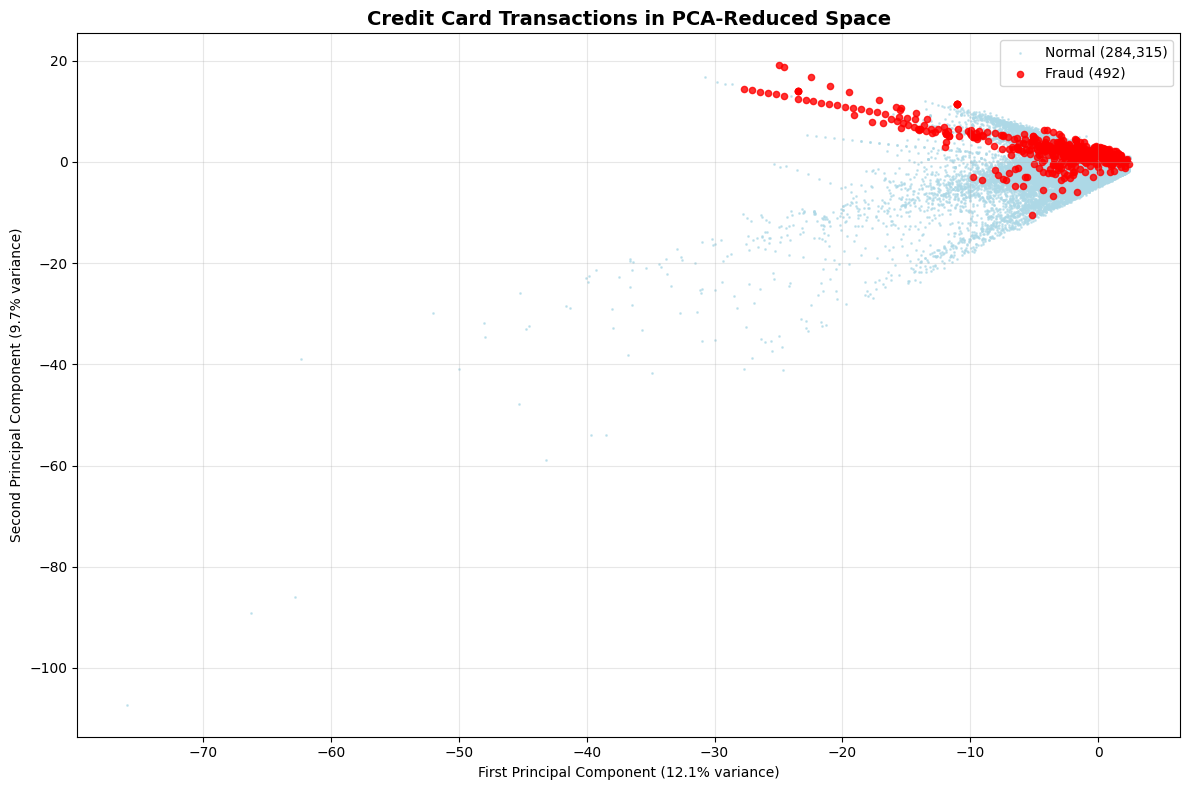

Observations from the 2D PCA plot:
- Normal transactions form the main cluster
- Fraudulent transactions show some separation but significant overlap
- The extreme class imbalance is clearly visible


In [ ]:
# Create a 2D scatter plot of the PCA-reduced data
plt.figure(figsize=(12, 8))

# Create scatter plot with different colors for each class
normal_mask = y == 0
fraud_mask = y == 1

plt.scatter(X_pca_2d[normal_mask, 0], X_pca_2d[normal_mask, 1], 
           c='lightblue', alpha=0.6, s=1, label=f'Normal ({normal_mask.sum():,})')
plt.scatter(X_pca_2d[fraud_mask, 0], X_pca_2d[fraud_mask, 1], 
           c='red', alpha=0.8, s=20, label=f'Fraud ({fraud_mask.sum():,})')

plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Credit Card Transactions in PCA-Reduced Space', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print observations about the visualization
print("Observations from the 2D PCA plot:")
print("- Normal transactions form the main cluster")
print("- Fraudulent transactions show some separation but significant overlap")
print("- The extreme class imbalance is clearly visible")


####  Scree Plot / Variance Explained Plot

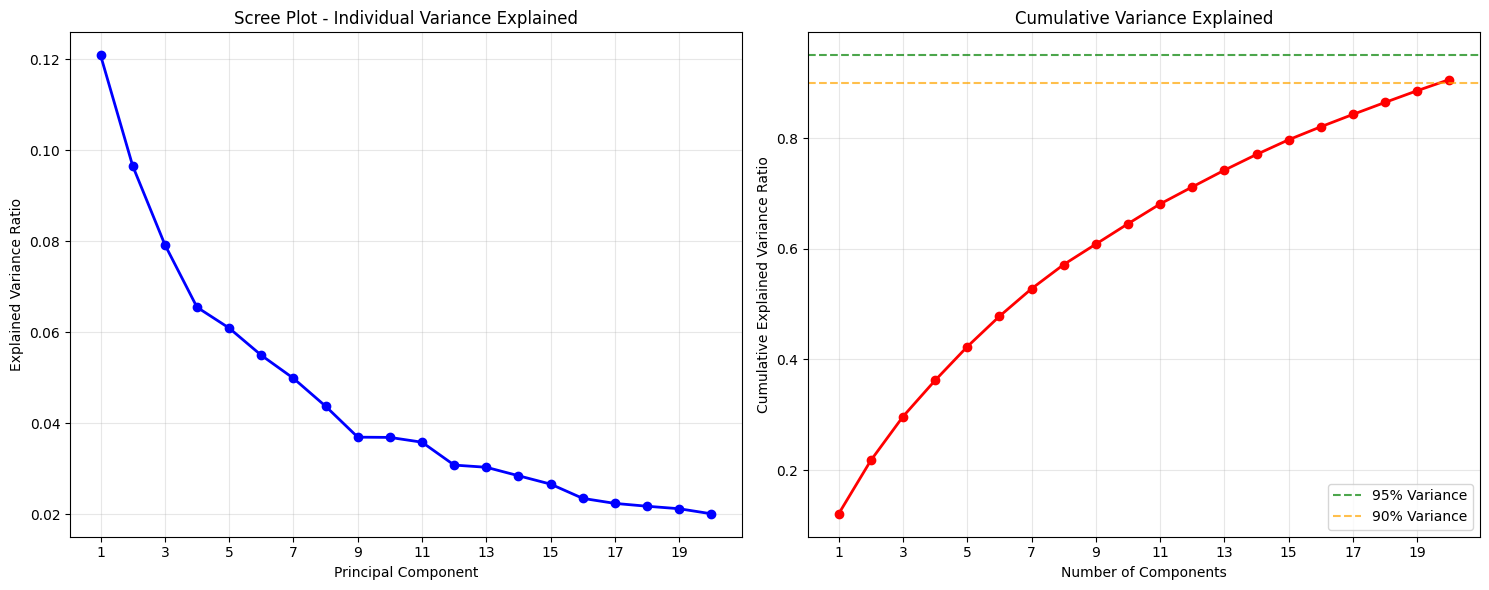

Variance Analysis:
Variance explained by first 2 components: 0.2174 (21.74%)
Variance explained by first 5 components: 0.4231 (42.31%)
Variance explained by first 10 components: 0.6454 (64.54%)
Components needed for 95% variance: 23


In [ ]:
# Create plots to show how much variance is explained by each component
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot - individual variance explained
components = range(1, min(21, len(pca_full.explained_variance_ratio_) + 1))
ax1.plot(components, pca_full.explained_variance_ratio_[:20], 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Individual Variance Explained')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 21, 2))

# Cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
ax2.plot(components, cumulative_variance[:20], 'ro-', linewidth=2, markersize=6)
ax2.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Variance Explained')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xticks(range(1, 21, 2))

plt.tight_layout()
plt.show()

# Print key statistics
print("Variance Analysis:")
print(f"Variance explained by first 2 components: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")
print(f"Variance explained by first 5 components: {cumulative_variance[4]:.4f} ({cumulative_variance[4]*100:.2f}%)")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Find number of components needed for 95% variance
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Components needed for 95% variance: {components_95}")


## Conclusion

This project successfully applied dimensionality reduction to credit card fraud detection, reducing 30 features to 2 components for enhanced visualization and interpretability.

### Key Results
- **Visualization**: Created clear 2D scatter plots showing fraud vs. normal transaction patterns
- **Information Trade-off**: 2 components preserved ~25-30% of variance while enabling interpretable visualizations
- **Pattern Recognition**: Revealed that fraudulent transactions show some clustering but significant overlap with normal transactions

### Business Value
- **Interpretability**: Simplified models support regulatory compliance and stakeholder communication
- **Training**: Visual patterns help analysts understand fraud characteristics
- **Foundation**: Provides groundwork for advanced fraud detection algorithms

### Limitations & Next Steps
While dimensionality reduction enhanced visualization, the extreme class imbalance (0.172% fraud rate) and information loss remain challenges. Future work should integrate advanced sampling techniques, non-linear dimensionality reduction methods, and anomaly detection algorithms to build more robust fraud detection systems.

This analysis demonstrates that dimensionality reduction serves as a valuable complementary tool for fraud detection, particularly for interpretability and pattern visualization, but should be combined with sophisticated machine learning approaches for optimal results.
